In [169]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [170]:
print(tf.__version__)  

2.11.0


## STEP 1 : 데이터 준비하기

In [609]:
from PIL import Image
import glob
import os

In [610]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.") 

In [611]:
folders = ['/paper','/rock','/scissor']

In [612]:
for i in ['/train','/test'] :
    image_dir_path = os.getenv('HOME')+'/Desktop/Life3/aiffel/project/data/rock_paper_scissor'+i
    
    for j in folders :
#         print(image_dir_path + j)
        resize_images(image_dir_path + j)

2401  images to be resized.


/var/folders/gw/_hckw7j932n6_zdqjr965yzc0000gn/T/ipykernel_11040/2160633127.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


2401  images resized.
2504  images to be resized.
2504  images resized.
2467  images to be resized.
2467  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [613]:
image_dir_path_train = os.getenv("HOME") + '/Desktop/Life3/aiffel/project/data/rock_paper_scissor/train'
image_dir_path_test = os.getenv("HOME") + '/Desktop/Life3/aiffel/project/data/rock_paper_scissor/test'

In [614]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [615]:
trp =len(os.listdir(image_dir_path_train+'/paper'))
trs = len(os.listdir(image_dir_path_train+'/scissor'))
trr = len(os.listdir(image_dir_path_train+'/rock'))
trtot = trp + trs +trr

trtot

7372

In [616]:
(x_train, y_train)=load_data(image_dir_path_train, number_of_data = trtot)
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 7372 입니다.
x_train shape: (7372, 28, 28, 3)
y_train shape: (7372,)


In [617]:
tsp =len(os.listdir(image_dir_path_test+'/paper'))
tss = len(os.listdir(image_dir_path_test+'/scissor'))
tsr = len(os.listdir(image_dir_path_test+'/rock'))
tstot = tsp + tss +tsr

tstot

300

In [618]:
(x_test, y_test)=load_data(image_dir_path_test, number_of_data = tstot)


x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (7372, 28, 28, 3)
y_test shape: (7372,)


라벨:  0


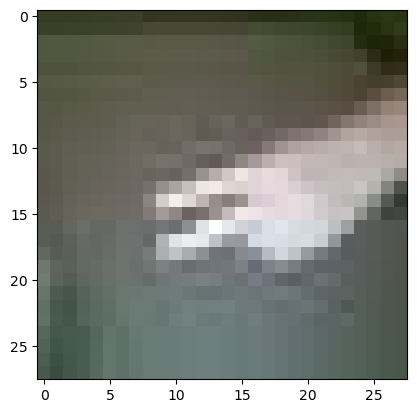

In [619]:
#이미지 확인
plt.imshow(x_train[1442])
print('라벨: ', y_train[1442])

## STEP 2 : 딥러닝 네트워크 학습시키기

In [623]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 0, 1, 2

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_278 (Conv2D)         (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_276 (MaxPooli  (None, 13, 13, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_279 (Conv2D)         (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_277 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_100 (Flatten)       (None, 800)               0         
                                                                 
 dense_200 (Dense)          

In [625]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 3)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (7372, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (7372, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [626]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
231/231 [==============================] - 6s 17ms/step - loss: 0.9266 - accuracy: 0.5453
Epoch 2/10
231/231 [==============================] - 4s 18ms/step - loss: 0.5591 - accuracy: 0.7792
Epoch 3/10
231/231 [==============================] - 4s 18ms/step - loss: 0.3810 - accuracy: 0.8524
Epoch 4/10
231/231 [==============================] - 4s 18ms/step - loss: 0.2801 - accuracy: 0.8981
Epoch 5/10
231/231 [==============================] - 4s 18ms/step - loss: 0.2053 - accuracy: 0.9267
Epoch 6/10
231/231 [==============================] - 4s 18ms/step - loss: 0.1580 - accuracy: 0.9436
Epoch 7/10
231/231 [==============================] - 4s 18ms/step - loss: 0.1235 - accuracy: 0.9573
Epoch 8/10
231/231 [==============================] - 4s 18ms/step - loss: 0.0965 - accuracy: 0.9661
Epoch 9/10
231/231 [==============================] - 4s 18ms/step - loss: 0.0782 - accuracy: 0.9733
Epoch 10/10
231/231 [==============================] - 4s 17ms/step - loss: 0.0595 - accura

## STEP 3 : 얼마나 잘 만들었는지 확인하기

In [627]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.6566 - accuracy: 0.6500 - 272ms/epoch - 27ms/step
test_loss: 2.6565964221954346
test_accuracy: 0.6499999761581421


In [628]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 7ms/step
model.predict() 결과 :  [9.9987841e-01 1.2121048e-04 3.5185630e-07]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


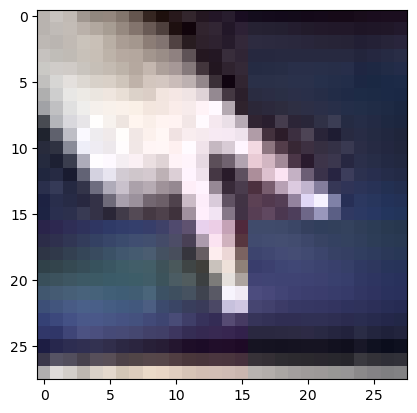

In [629]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.3344348e-04 9.9976653e-01 3.8919953e-08]
라벨: 0, 예측결과: 1


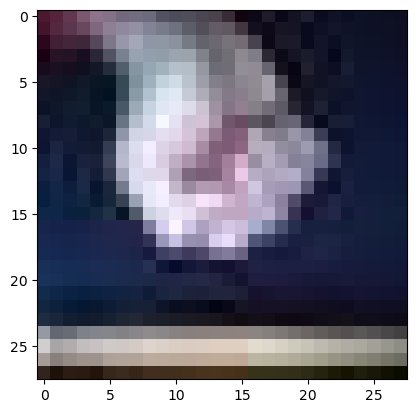

예측확률분포: [1.4571731e-01 8.9218463e-07 8.5428178e-01]
라벨: 0, 예측결과: 2


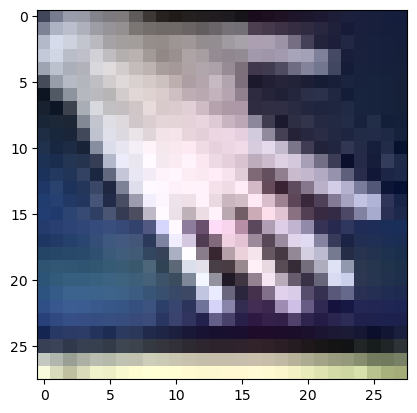

예측확률분포: [8.0383337e-08 7.6483814e-03 9.9235159e-01]
라벨: 0, 예측결과: 2


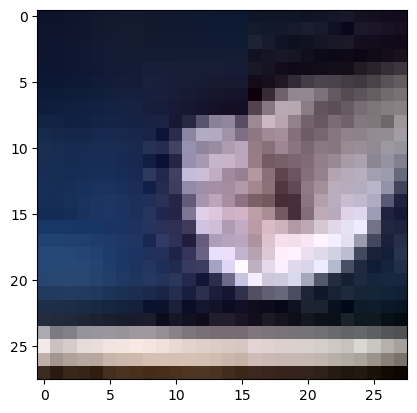

예측확률분포: [9.956697e-02 2.493341e-06 9.004305e-01]
라벨: 0, 예측결과: 2


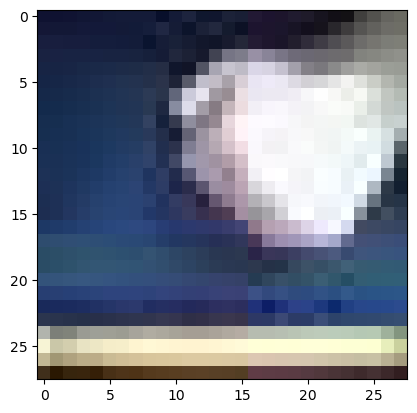

예측확률분포: [6.2347739e-03 1.6296837e-04 9.9360222e-01]
라벨: 0, 예측결과: 2


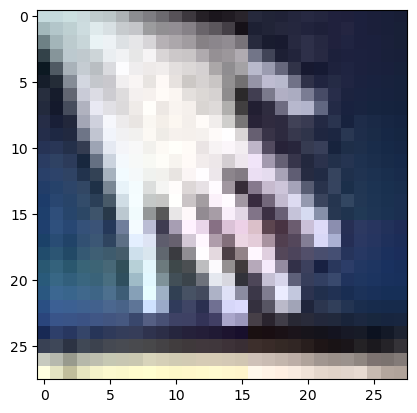

In [630]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_val1[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_val1[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## STEP 4 : 더 좋은 네트워크 만들어 보기

## evaluation plot as function

In [631]:
def evalplot(history, a):
    fig = plt.figure(figsize =(12,6))
    ax = fig.add_subplot(1,2,1)
    plt.plot(a,history.history['loss'],label = 'train')
    plt.plot(a,history.history['val_loss'], c='red', label = 'val')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss')

    ax = fig.add_subplot(1,2,2)
    plt.plot(a,history.history['accuracy'], label = 'train')
    plt.plot(a,history.history['val_accuracy'], c='red', label = 'val')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('accuracy(%)')
    plt.title('accuracy')

    plt.show()

### Adding Layer, Data Augmentation, Adjusting Channel/kernels

In [632]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32# 증가
n_channel_2=64 # 증가
n_channel_3=64 # 증가
n_dense=128 # 증가
n_train_epoch= 10 # 증가

model=keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.RandomFlip("vertical"))
model.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3,(3,3), activation='relu')) #layer 추가
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# model = tf.keras.models.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])


# model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_data = (x_test_reshaped, y_test))



# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/10
231/231 [==============================] - 11s 39ms/step - loss: 1.0032 - accuracy: 0.4693 - val_loss: 0.7080 - val_accuracy: 0.6700
Epoch 2/10
231/231 [==============================] - 8s 36ms/step - loss: 0.5921 - accuracy: 0.7550 - val_loss: 1.0386 - val_accuracy: 0.5467
Epoch 3/10
231/231 [==============================] - 8s 36ms/step - loss: 0.3498 - accuracy: 0.8668 - val_loss: 0.7092 - val_accuracy: 0.7533
Epoch 4/10
231/231 [==============================] - 8s 36ms/step - loss: 0.2117 - accuracy: 0.9244 - val_loss: 0.6184 - val_accuracy: 0.7700
Epoch 5/10
231/231 [==============================] - 8s 36ms/step - loss: 0.1447 - accuracy: 0.9478 - val_loss: 1.1824 - val_accuracy: 0.6800
Epoch 6/10
231/231 [==============================] - 8s 36ms/step - loss: 0.0884 - accuracy: 0.9674 - val_loss: 1.2568 - val_accuracy: 0.6900
Epoch 7/10
231/231 [==============================] - 9s 38ms/step - loss: 0.0696 - accuracy: 0.9727 - val_loss: 2.0675 - val_accuracy: 0.620

학습이 증가할수록 예측결과는 좋아지는 것을 볼 수 있으나...

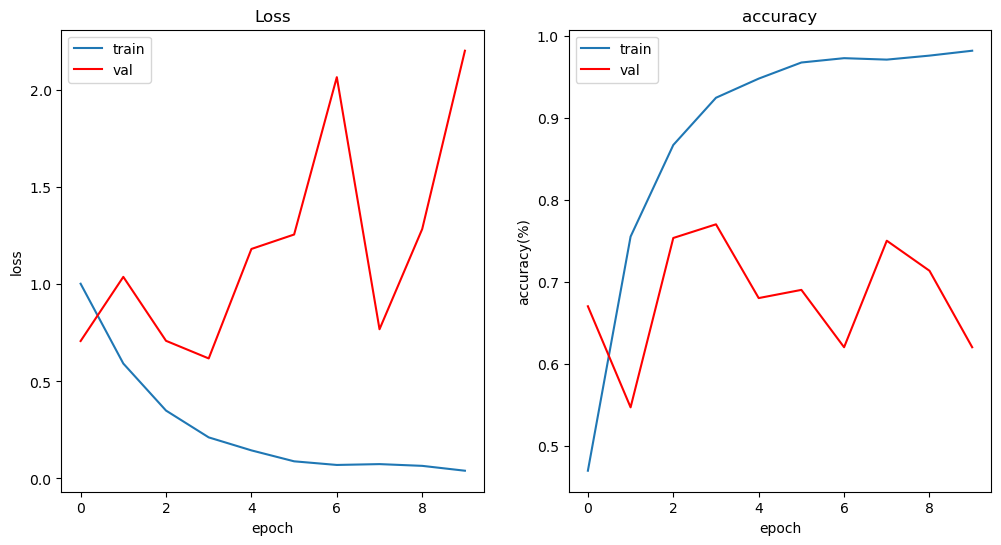

In [633]:
a= list(range(n_train_epoch))
evalplot(history, a)

### Adding Layer, Data Augmentation, Adjusting Channel/kernels + Dropout

In [635]:

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_data = (x_test_reshaped, y_test))

model.summary()


# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/10
231/231 [==============================] - 9s 29ms/step - loss: 1.0836 - accuracy: 0.3810 - val_loss: 1.0055 - val_accuracy: 0.4233
Epoch 2/10
231/231 [==============================] - 6s 28ms/step - loss: 0.9029 - accuracy: 0.5670 - val_loss: 1.1455 - val_accuracy: 0.4767
Epoch 3/10
231/231 [==============================] - 7s 30ms/step - loss: 0.7330 - accuracy: 0.6739 - val_loss: 1.2791 - val_accuracy: 0.5200
Epoch 4/10
231/231 [==============================] - 6s 27ms/step - loss: 0.6136 - accuracy: 0.7408 - val_loss: 0.8423 - val_accuracy: 0.6000
Epoch 5/10
231/231 [==============================] - 6s 26ms/step - loss: 0.5265 - accuracy: 0.7836 - val_loss: 0.8163 - val_accuracy: 0.6700
Epoch 6/10
231/231 [==============================] - 6s 26ms/step - loss: 0.4660 - accuracy: 0.8120 - val_loss: 0.5536 - val_accuracy: 0.7567
Epoch 7/10
231/231 [==============================] - 6s 26ms/step - loss: 0.4064 - accuracy: 0.8356 - val_loss: 0.6622 - val_accuracy: 0.7467

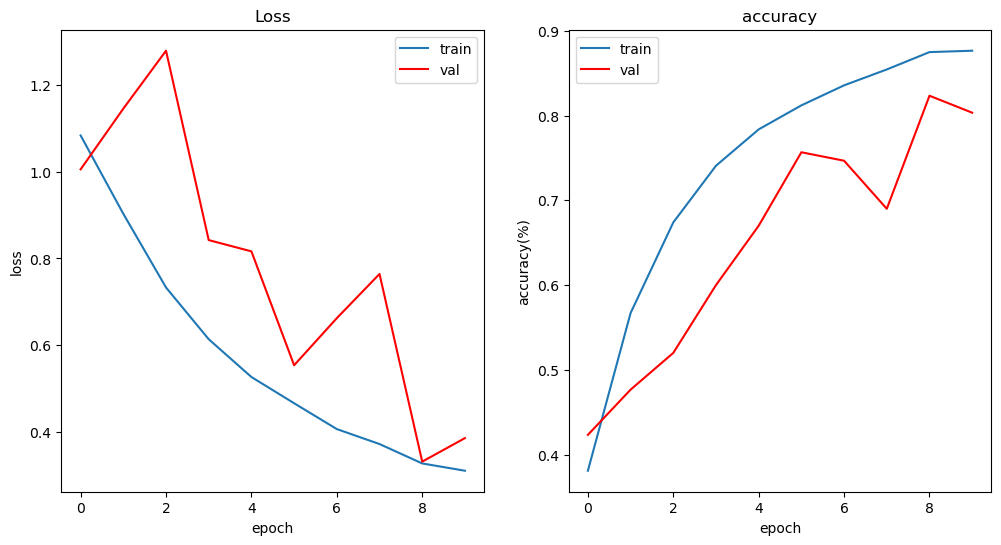

In [636]:
a= list(range(n_train_epoch))
evalplot(history, a)

## STEP 5 : 결론

이번에는 신경망을 이용해 이미지(가위, 바위, 보)를 분류하는 프로젝트를 수행하였습니다. 

모델 성능을 올리기 위해, data augmentation, hyperparameter optimizing, layer 추가 등을 하였습니다. 

성능이 확실히 개선되었던 부분은 두가지 부분이였습니다.

1. 데이터 추가
2. data augmentation : horizontal, vertical, horizontal_and_vertical

어려웠지만 목표 점수인 60%를 통과하였습니다.

아직까지 모델에 대한 전반적인 이해가 없어서, 어떤 이유로 성능이 개선되는지는 잘 모르겠습니다.

단순히 아래 링크를 찾아보고 몇가지 optimizing 방법을 테세트해본 결과뿐입니다.

앞으로 딥러닝 지식을 한층 더 올리면서 오늘까지 이해하지 못한 것들을 배워나가도록 하겠습니다. 

https://towardsdatascience.com/hacking-your-image-recognition-model-909ad4176247